In [3]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model building
import torch 
import torch.nn as nn

# data augmentation
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image

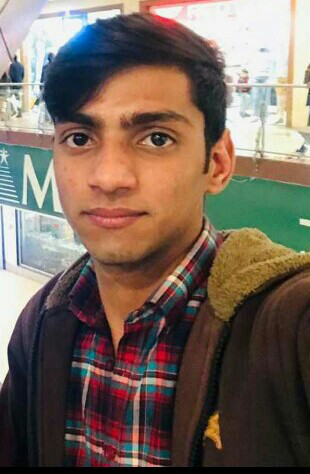

In [6]:
image = Image.open('ak47.jpg')
image

In [7]:
image = np.array(image)
image.shape

(474, 310, 3)

In [21]:
transform = A.Compose(
[
    A.Resize(width=300, height=300),
    A.CenterCrop(height=256, width=256),
    A.Rotate(limit=40, p=0.9), # will aplly to 90% of the cases
    A.HorizontalFlip(p=0.5), # will flip only 50% of the time
    A.VerticalFlip(p=0.5), # -----------------------------------
    A.RGBShift(r_shift_limit=25 , g_shift_limit=25, b_shift_limit=25, p=0.9),# will adjust the intensity of colours by prob p
    A.Normalize(mean = [0, 0, 0], std=[1,1,1]), # have to do this for stable training i guess
    #ToTensorV2()  # just used to form dataset as tensors
])

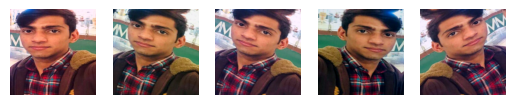

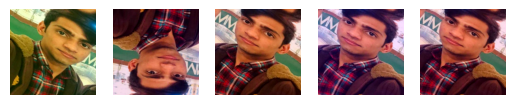

In [22]:
images_list = []
num_images = 10
for i in range(num_images): # i wish that there would be 15 images that are different from each other
    augmentation = transform(image=image) # gonna return a dictionary 
    aug_image = augmentation["image"] # if there are masks then we can simply pass one more argument to transform 
    images_list.append(aug_image)
    
num_rows = 2
num_cols = 5 # num_images = num_rows*num_cols
#figure = plt.figure(figsize=(10, 10))
for i in range(num_rows):
    for j in range(num_cols):
        plt.subplot(num_rows, num_cols, num_cols*i + j + 1)
        plt.imshow(images_list[num_cols*i + j])
        plt.axis('off')
    plt.show()